In [1]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 11s 26ms/step - loss: 0.3734 - accuracy: 0.8868 - val_loss: 0.0865 - val_accuracy: 0.9763
Epoch 2/15
422/422 [==============================] - 11s 26ms/step - loss: 0.1131 - accuracy: 0.9657 - val_loss: 0.0600 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 11s 27ms/step - loss: 0.0870 - accuracy: 0.9732 - val_loss: 0.0468 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 11s 27ms/step - loss: 0.0720 - accuracy: 0.9779 - val_loss: 0.0423 - val_accuracy: 0.9873
Epoch 5/15
422/422 [==============================] - 12s 27ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0417 - val_accuracy: 0.9885
Epoch 6/15
422/422 [==============================] - 11s 27ms/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0368 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 11s 27ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0376 - val_accuracy:

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022118818014860153
Test accuracy: 0.991599977016449


In [6]:
def program_run(input_image):
    # делим картинку с числом на картинки с цифрами
    digit_images = np.split(input_image, input_image.shape[1] / 28, axis=1)
    digit_images = np.array(digit_images)

    # смотрим какие цифры
    # for ar in digit_images:
    #     plt.imshow(ar, cmap='gray')
    #     plt.show()

    # прогоняем картинки с цифрами через модель
    prediction_result = model.predict(digit_images)

    # обрабатываем результат
    ans = ""
    for case in np.split(prediction_result, len(digit_images)):
        predicted = np.argmax(case)
        ans += str(predicted)

    print("программа считает что это число:", ans)

In [7]:
def generate_input_image(possible_digits=x_test,
                         input_length=4):
    selected_digit_images = [possible_digits[random.randint(0, len(possible_digits))] for _ in range(input_length)]
    concatenated = np.concatenate(selected_digit_images, axis=1)

    # смотрим сгенерированное число
    plt.title('сгенерированное число')
    plt.imshow(concatenated, cmap='gray')
    plt.show()

    return concatenated

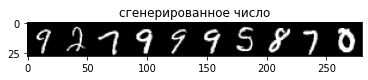

программа считает что это число: 9279995870


In [8]:
input_image = generate_input_image(input_length=10)

program_run(input_image)